In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [34]:
data = pd.read_csv('dermatology_csv.csv')

X = data.iloc[:,:34]
y = data.iloc[:,-1]

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy ='mean')
imputer = imputer.fit(X)
X = imputer.transform(X)
X = pd.DataFrame(X)

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 4)

In [36]:
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [37]:
pred = rf.predict(X_test)
pred
pred.shape[0]

110

In [38]:
s = y_test.values
count =0

In [39]:
for i in range(len(pred)):
    if pred[i]==s[i]:
        count = count +1

count

108

In [40]:
count/len(pred)

0.9818181818181818

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.97      1.00      0.98        32
           2       1.00      0.96      0.98        23
           3       1.00      1.00      1.00        19
           4       0.93      1.00      0.96        13
           5       1.00      1.00      1.00        17
           6       1.00      0.83      0.91         6

    accuracy                           0.98       110
   macro avg       0.98      0.96      0.97       110
weighted avg       0.98      0.98      0.98       110



In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred)
cm

array([[32,  0,  0,  0,  0,  0],
       [ 0, 22,  0,  1,  0,  0],
       [ 0,  0, 19,  0,  0,  0],
       [ 0,  0,  0, 13,  0,  0],
       [ 0,  0,  0,  0, 17,  0],
       [ 1,  0,  0,  0,  0,  5]])

Text(69.0, 0.5, 'Truth')

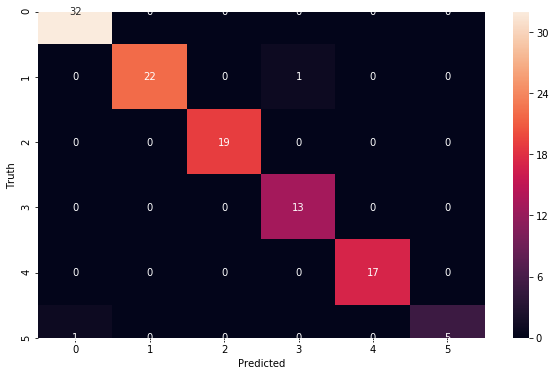

In [44]:
import seaborn as sn
plt.figure(figsize = (10,6))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')